## 利用布隆过滤器实现重复数据筛选
___
思想：
它实际上是一个很长的二进制向量和一系列随机映射函数。布隆过滤器可以用于检索一个元素是否在一个集合中。它的优点是空间效率和查询时间都比一般的算法要好的多，缺点是有一定的误识别率和删除困难。(源: 百度百科)
执行过程如下
<br>
<br>
+ 定义多个随机映射函数，同时确定命中率（bloom filter具有一定的识别错误率，但不会疏漏）
<br>
<br>
+ 根据公式计算得到需要创建的二进制列表长度
<br>
<br>
+ 第一遍将数据进行映射。原始位数组的设置比较简单和普通bloom filter一样，将映射到的位置设置为1即可。扩展数组设置为1的条件是：原始数组为1，且再一次被映射到。
<br>
<br>
+ 第二遍检查扩展数组。将数据重新进行映射。如果所有映射位置都为1，表示存在与该数据重复的数据。

*具体过程可参考下图*

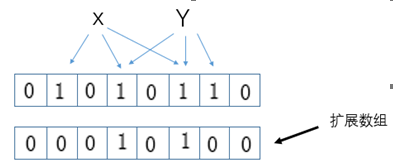
<center><br>如图有三个hash函数，原始数组中每个映射到的位置都被置为1。<br>扩展数组中只有在原始数组已经为1的情况下再次被映射到才会被设置为1</center>

In [1]:
import numpy as np
from BitVector import BitVector

### 定义相关类，类中包含多个函数。

#### generate_seeds 
接受一个一个参数num。num表示需要的种子个数，产生的种子供后面的hash函数使用。
<br>
#### BKDhash 
是一个哈希函数，接受一个随机种子。将传输进来的字符串hash成一个整数。
<br>
#### setArray 
作用是初始设置位数组。将两个数组都进行映射标记。
<br>
#### findDuplicate 
是该类的核心。接受一个list类型的数组，返回重复的数据，以及他们所在的序号位置。返回形式为dict（字符串：{位置1， 位置2， ...}）


In [2]:
class BloomFilter_M(object):
	"""docstring for BloomFilter_M"""
	''' 
	m is the length of the bitvector
	n is the number of the key
	k is the number of the hash function
	p is positive-false rate
	'''
	def __init__(self, n, p):
		self.m = int(-(n*np.log(p))/(np.log(2)**2))
		self.bitarray = BitVector(size = self.m)
		self.markarry = BitVector(size = self.m)
		self.n = n
		self.k = int(-np.log2(p))
		self.p = p

	def generate_seeds(self, num):
		x = 131
		count = 0
		while count < num:
			yield x
			x = x*10+3 if count%2 == 0 else x*10+1
			count += 1

	# hash function
	def BKDRHash(self, string, seed):
		# seed = 131
		my_hash = 0
		for ch in string:
			my_hash = my_hash * seed + ord(ch)
		return my_hash % self.m

	def SetArray(self, L):
		for l in L:
			seed = self.generate_seeds(self.k)
			for s in seed:
				temp_index = self.BKDRHash(str(l), s)
				if self.bitarray[temp_index] == 1:
					self.markarry[temp_index] = 1
				else:
					self.bitarray[temp_index] = 1

	def findDuplicate(self, L):
		self.SetArray(L)
		duplicate = {}
		indexs = [-1]*self.k
		for l in L:
			seed = self.generate_seeds(self.k)
			n = 0
			for s in seed:
				flag = True
				temp_index = self.BKDRHash(str(l), s)
				indexs[n] = temp_index
				n += 1
				if self.markarry[temp_index] == 0:
					flag = False
					break
			if flag:
				duplicate[l] = indexs
		duplicate_keys = {x:[] for x in duplicate.keys()}
		for i in range(len(L)):
			if L[i] in duplicate.keys():
				duplicate_keys[L[i]].append(i)
		return duplicate_keys

### 测试模块

In [3]:
test = BloomFilter_M(10, 0.0001)
L = ['Le', 'pang', 'Le', 'test', 'tet', 'text', 'tett', 'test', 'png', 'text', 'png']
print(test.findDuplicate(L))

{'Le': [0, 2], 'test': [3, 7], 'text': [5, 9], 'png': [8, 10]}


In [4]:
t1 = ['a', 'b', 'c']
t2 = ['a', 'c']
t3 = ['b', 'd']

print(set(t1) > set(t3))

False
